# Proyek Analisis Data: Bike Sharing
- **Nama:** Chatarina Evangelista Sitorus
- **Email:** chatarinaevas304@gmail.com
- **ID Dicoding:** dicodingchatzz

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan jumlah penyewaan sepeda pada hari kerja dan akhir pekan?
- Bagaimana perbedaan jumlah penyewaan sepeda berdasarkan musim?
- Bagaimana pola penyewaan sepeda antara pengguna kasual dan pengguna terdaftar berdasarkan hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [12]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset Bike Sharing terdiri dari dua file, yaitu day.csv dan hour.csv. day.csv memiliki 731 baris, yang merepresentasikan data penyewaan sepeda harian, sedangkan hour.csv memiliki 17.379 baris, yang mencatat penyewaan sepeda dalam skala jam.
- Kedua dataset memiliki kolom yang hampir sama, seperti season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, dan cnt. Namun, hour.csv memiliki tambahan kolom hr (jam), yang tidak ada di day.csv, karena mencatat data per jam.
- Jumlah data pada day.csv sesuai dengan jumlah hari dalam dua tahun (365 hari di tahun pertama dan 366 hari di tahun kedua), sementara hour.csv memiliki jumlah baris yang lebih besar karena mencatat data per jam selama periode yang sama.


### Assessing Data

Menilai data day_df

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Tidak ada *missing value*, yakni semua 731 baris lengkap pada setiap kolom yang ditunjukkan oleh jumlah Non-Null Count yang sama.
- Terdapat kesalahan tipe data untuk kolom dteday yaitu object yang seharusnya datetime, maka perlu diubah pada tahap Cleaning Data.
- Terdapat kesalahan tipe data untuk kolom *season, yr, mnth, holiday, weekday, workingday, weathersit* yaitu object yang seharusnya category, maka perlu diubah pada tahap Cleaning Data.


In [16]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak ada *missing values* yang berarti tidak ada nilai null


In [17]:
print("Jumlah Duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah Duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada data duplikat pada day_df


Menilai data hour_df

In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Tidak ada *missing value*, yakni semua 731 baris lengkap pada setiap kolom yang ditunjukkan oleh jumlah Non-Null Count yang sama.
- Terdapat kesalahan tipe data untuk kolom dteday yaitu object yang seharusnya datetime, maka perlu diubah pada tahap Cleaning Data.
- Terdapat kesalahan tipe data untuk kolom *season, yr, mnth, holiday, weekday, workingday, weathersit* yaitu object yang seharusnya category, maka perlu diubah pada tahap Cleaning Data.


In [19]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak ada *missing values* yang berarti tidak ada nilai null


In [20]:
print("Jumlah Duplikasi: ", day_df.duplicated().sum())
hour_df.describe()

Jumlah Duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada data duplikat pada hour_df


### Cleaning Data

Cleaning data day_df

In [26]:
#Konversi kolom dteday ke Format Datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [25]:
#Konversi kolom season, yr, mnth, weekday, weathersit ke Format Category
categorical_cols_day = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols_day:
    day_df[col] = day_df[col].astype('category')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

Cleaning data hour_df

In [27]:
#Konversi kolom dteday ke Format Datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [28]:
#Konversi kolom season, yr, mnth, weekday, weathersit ke Format Category
categorical_cols_hour = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols_hour:
    hour_df[col] = hour_df[col].astype('category')
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data sudah diperbaiki (kolom dteday menjadi 'datetime', dan kolom-kolom kategori menjadi 'category').
- Tidak ada duplikasi dan *missing value* di day_df maupun hour_df, sehingga tidak dilakukan *cleaning duplicates* dan *missing values* 

## Exploratory Data Analysis (EDA)

### Explore Data day_df 

In [ ]:
#Menampilkan Sampel Data
day_df.sample(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
72,73,2011-03-14,1,0,3,0,1,1,1,0.325217,0.332000,0.496957,0.136926,359,1687,2046
622,623,2012-09-14,3,1,9,0,5,1,1,0.633333,0.594083,0.672500,0.103863,1379,6630,8009
21,22,2011-01-22,1,0,1,0,6,0,1,0.059130,0.079070,0.400000,0.171970,93,888,981


In [ ]:
#Menampilkan Statistik Deskriptif Keseluruhan
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [42]:
#Jumlah Hari Unik dalam Dataset
print("Jumlah unik hari yang tercatat:", day_df['dteday'].nunique())

#Statistik Penyewaan Sepeda Secara Keseluruhan
print("\nStatistik Penyewaan Sepeda Secara Keseluruhan :")
day_df[['casual', 'registered', 'cnt']].describe()


Jumlah unik hari yang tercatat: 731

Statistik Penyewaan Sepeda Secara Keseluruhan :


,casual,registered,cnt
count,731.000000,731.000000,731.000000
mean,848.176471,3656.172367,4504.348837
std,686.622488,1560.256377,1937.211452
min,2.000000,20.000000,22.000000
25%,315.500000,2497.000000,3152.000000
50%,713.000000,3662.000000,4548.000000
75%,1096.000000,4776.500000,5956.000000
max,3410.000000,6946.000000,8714.000000


**Insight:** Dataset mencatat total 731 hari unik, yang mencakup data penyewaan sepeda selama dua tahun penuh.

In [ ]:
#Statistik Penyewaan Berdasarkan Hari Kerja vs Akhir Pekan
day_df.groupby("workingday", observed=False).agg({
    "cnt": ["count", "mean", "min", "max"]
})


cnt                        
           count         mean  min   max
workingday                              
0            231  4330.168831  605  8714
1            500  4584.820000   22  8362

**Insight:** Penyewaan sepeda lebih konsisten di hari kerja, tetapi akhir pekan memiliki puncak peminjaman yang lebih tinggi.

In [50]:
#Statistik Penyewaan Berdasarkan Musim
day_df.groupby("season", observed=False).agg({
    "cnt": ["count", "mean", "min", "max"]
})


cnt                         
       count         mean   min   max
season                               
1        181  2604.132597   431  7836
2        184  4992.331522   795  8362
3        188  5644.303191  1115  8714
4        178  4728.162921    22  8555

**Insight:** 
- Musim Summer (3) memiliki rata-rata penyewaan sepeda tertinggi, sedangkan Winter (1) memiliki rata-rata penyewaan sepeda terendah, menunjukkan bahwa cuaca hangat meningkatkan penggunaan sepeda.
- Pelabelan musim akan dilakukan setelah merge. 

In [51]:
#Statistik Penyewaan Kasual vs Terdaftar
day_df.agg({
    "casual": ["sum", "mean", "min", "max"],
    "registered": ["sum", "mean", "min", "max"]
})

,casual,registered
sum,620017.000000,2.672662e+06
mean,848.176471,3.656172e+03
min,2.000000,2.000000e+01
max,3410.000000,6.946000e+03


**Insight:** Pengguna terdaftar jauh lebih banyak dibandingkan pengguna kasual, dengan rata-rata penyewaan harian sekitar 3.656 untuk terdaftar dan 848 untuk kasual. 

In [52]:
#Distribusi weathersit (Kondisi Cuaca)
day_df["weathersit"].value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

**Insight:** Sebagian besar hari memiliki kondisi cuaca cerah (463 hari), sementara cuaca buruk (kategori 3) jarang terjadi (21 hari).

In [54]:
#Statistik hum dan windspeed (Cek Keanehan Data)
day_df[["hum", "windspeed"]].describe()

,hum,windspeed
count,731.000000,731.000000
mean,0.627894,0.190486
std,0.142429,0.077498
min,0.000000,0.022392
25%,0.520000,0.134950
50%,0.626667,0.180975
75%,0.730209,0.233214
max,0.972500,0.507463


**Insight:** Ada keanehan pada hum (kelembaban) karena terdapat nilai 0.000, yang tidak masuk akal untuk kelembaban udara. Namun, karena analisis ini tidak berfokus pada pengaruh kelembaban terhadap penyewaan sepeda, nilai ini tidak akan diubah. Sementara itu, nilai windspeed (kecepatan angin) tampak wajar, karena tidak ada nilai ekstrem atau nol yang mencurigakan. 

In [56]:
#Statistik Penyewaan Sepeda Berdasarkan Hari Libur
day_df.groupby("holiday", observed=False)["cnt"].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,710.0,4527.104225,1929.013947,22.0,3214.0,4558.0,5932.75,8714.0
1,21.0,3735.000000,2103.350660,1000.0,1951.0,3351.0,6034.00,7403.0


**Insight:** Rata-rata penyewaan sepeda pada hari libur (3,735) lebih rendah dibanding hari biasa (4,527), tetapi variasinya lebih tinggi, menunjukkan bahwa jumlah peminjaman di hari libur lebih tidak terprediksi

### Explore Data hour_df

In [58]:
#Menampilkan Sampel Data
hour_df.sample(3) 


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1747,1748,2011-03-18,1,0,3,12,0,5,1,2,0.56,0.5303,0.49,0.3582,72,123,195
14503,14504,2012-09-01,3,1,9,12,0,6,0,2,0.80,0.7576,0.55,0.1642,187,284,471
8715,8716,2012-01-03,1,1,1,23,0,2,1,1,0.10,0.0758,0.46,0.3881,0,18,18


In [59]:
#Menampilkan Statistik Deskriptif Keseluruhan
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.000000,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,2.0,12.0,NaN,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,7.0,NaN,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,8734.0,1488.0,NaN,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [61]:
#Cek Jumlah Jam Unik
print("Jumlah unik hr:", hour_df['hr'].nunique())  # Seharusnya 24 jam per hari

#Statistik Penyewaan Sepeda Secara Keseluruhan
print("\nStatistik Penyewaan Sepeda Secara Keseluruhan :")
hour_df[['casual', 'registered', 'cnt']].describe()


Jumlah unik hr: 24

Statistik Penyewaan Sepeda Secara Keseluruhan :


,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000
mean,35.676218,153.786869,189.463088
std,49.305030,151.357286,181.387599
min,0.000000,0.000000,1.000000
25%,4.000000,34.000000,40.000000
50%,17.000000,115.000000,142.000000
75%,48.000000,220.000000,281.000000
max,367.000000,886.000000,977.000000


**Insight:** Data mencakup 24 jam per hari, dengan rata-rata penyewaan 189 sepeda per jam, di mana penyewaan oleh pengguna terdaftar jauh lebih tinggi dibandingkan pengguna kasual.

In [ ]:
#Perbandingan Penyewaan pada Hari Kerja vs Akhir Pekan
hour_df.groupby("workingday", observed=False).agg({
    "cnt": ["count", "mean", "min", "max"]
})


cnt                     
            count        mean min  max
workingday                            
0            5514  181.405332   1  783
1           11865  193.207754   1  977

**Insights:** Meskipun rata-rata penyewaan lebih tinggi pada hari kerja, terdapat jam-jam dengan peminjaman sangat rendah, bahkan lebih kecil dibanding akhir pekan

In [63]:
#Perbedaan Penyewaan Berdasarkan Musim
hour_df.groupby("season", observed=False).agg({
    "cnt": ["count", "mean", "min", "max"]
})


cnt                     
       count        mean min  max
season                           
1       4242  111.114569   1  801
2       4409  208.344069   1  957
3       4496  236.016237   1  977
4       4232  198.868856   1  967

**Insights:** 
- Musim Summer (3) memiliki rata-rata penyewaan tertinggi (236 per jam), sedangkan Winter (1) memiliki yang terendah (111 per jam), menunjukkan bahwa cuaca hangat mendorong lebih banyak penyewaan sepeda
- Pelabelan musim akan dilakukan setelah merge.

In [64]:
#Pola Penyewaan Kasual vs Terdaftar Berdasarkan Hari Kerja
hour_df.groupby("workingday", observed=False).agg({
    "casual": ["sum", "mean", "min", "max"],
    "registered": ["sum", "mean", "min", "max"]
})


casual                     registered                     
               sum       mean min  max        sum        mean min  max
workingday                                                            
0           316732  57.441422   0  367     683537  123.963910   0  601
1           303285  25.561315   0  264    1989125  167.646439   0  886

**Insights:**
- Pada hari kerja, pengguna terdaftar lebih dominan dengan rata-rata 168 penyewaan per jam, jauh lebih tinggi dibandingkan pengguna kasual yang hanya 25 penyewaan per jam. 
- Sebaliknya, pada akhir pekan, pengguna kasual meningkat hingga 57 penyewaan per jam, sementara pengguna terdaftar turun menjadi 124 penyewaan per jam. 
- Ini menunjukkan bahwa pengguna terdaftar lebih sering menyewa sepeda untuk keperluan rutin, sedangkan pengguna kasual lebih banyak menyewa di akhir pekan untuk aktivitas santai atau rekreasi.

In [65]:
#Distribusi Cuaca (Weathersit)
hour_df["weathersit"].value_counts()


weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

**Insights:**
Mayoritas peminjaman terjadi dalam kondisi cuaca cerah/berawan (weathersit = 1).
Penyewaan dalam kondisi hujan (weathersit = 3) sangat jarang terjadi.

In [66]:
#Cek Keanehan Data pada hum dan windspeed
hour_df[["hum", "windspeed"]].describe()


,hum,windspeed
count,17379.000000,17379.000000
mean,0.627229,0.190098
std,0.192930,0.122340
min,0.000000,0.000000
25%,0.480000,0.104500
50%,0.630000,0.194000
75%,0.780000,0.253700
max,1.000000,0.850700


**Insights:**
- Ditemukan nilai *hum* (kelembaban) = 0, yang tidak masuk akal, tetapi tidak diperbaiki karena tidak berhubungan langsung dengan 3 pertanyaan bisnis utama dan analisis lanjutan.
- *windspeed* tampak normal, tidak ada nilai ekstrem yang mencurigakan.

### Explore Data day_df dan hour_df

Menggabungkan data *day_df* dan *hour_df*

In [67]:
all_df = pd.merge(
    hour_df, 
    day_df, 
    on="dteday", 
    how="left", 
    suffixes=("_hour", "_day")
)

#Kolom yang dipertahankan
selected_columns = [
    "dteday", "season_hour", "yr_hour", "mnth_hour", "hr", "holiday_hour", 
    "weekday_hour", "workingday_hour", "weathersit_hour", "temp_hour", "atemp_hour", 
    "hum_hour", "windspeed_hour", "casual_hour", "registered_hour", "cnt_hour"
]
all_df = all_df[selected_columns]

# Menghilangkan suffix "_hour" 
all_df.columns = [col.replace("_hour", "") if col.endswith("_hour") else col for col in all_df.columns]
all_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:** Data day_df dan hour_df berhasil dimerge menjadi all_df

Labelling season

In [68]:
season_dict = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}
all_df["season_label"] = all_df["season"].map(season_dict)
print(all_df["season_label"].value_counts()) # Cek distribusi musim setelah transformasi

season_label
Summer    4496
Spring    4409
Winter    4242
Fall      4232
Name: count, dtype: int64


Export

In [69]:
# Ekspor dataset ke folder "dashboard"
all_df.to_csv("dashboard/main_data.csv", index=False)


**Insight**

Tahapan merge dan export:
- Menggabungkan data dari hour_df dengan day_df, dengan menghapus beberapa kolom yang sudah ada di hour_df agar tidak terjadi duplikasi.
- Menggunakan dteday sebagai kunci penggabungan karena kedua dataset berbagi kolom ini.
- Menyimpan hasil merge ke dalam file CSV (dashboard/main_data.csv) agar bisa digunakan pada tahap berikutnya, termasuk pembuatan dashboard.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan jumlah penyewaan sepeda pada hari kerja dan akhir pekan?

In [70]:

all_df.sample(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label
766,2011-02-04,1,0,2,9,0,5,1,2,0.16,0.1818,0.80,0.1343,3,124,127,Winter
10234,2012-03-07,1,1,3,12,0,3,1,1,0.44,0.4394,0.38,0.3881,40,175,215,Winter
13067,2012-07-03,3,1,7,16,0,2,1,2,0.90,0.7727,0.24,0.1940,90,437,527,Summer
8769,2012-01-06,1,1,1,5,0,5,1,2,0.20,0.2121,0.80,0.1343,0,13,13,Winter
15676,2012-10-20,4,1,10,9,0,6,0,1,0.50,0.4848,0.59,0.1343,106,257,363,Fall


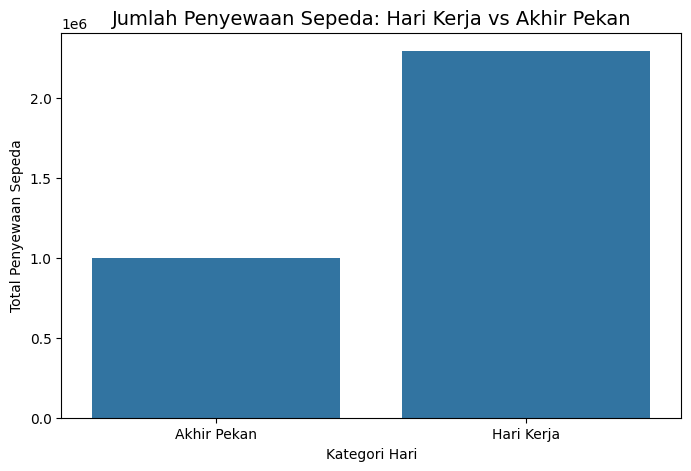

In [ ]:
# Mengelompokkan data berdasarkan hari kerja vs akhir pekan
workingday_counts = all_df.groupby("workingday", observed=True)["cnt"].sum().reset_index()
# Mengubah label numerik menjadi kategori yang lebih deskriptif
label_mapping = {0: "Akhir Pekan", 1: "Hari Kerja"}
workingday_counts["workingday"] = workingday_counts["workingday"].map(label_mapping)

#Jumlah Penyewaan Sepeda Hari Kerja vs Akhir Pekan dalam bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=workingday_counts, x="workingday", y="cnt")
plt.title("Jumlah Penyewaan Sepeda: Hari Kerja vs Akhir Pekan", fontsize=14)
plt.xlabel("Kategori Hari")
plt.ylabel("Total Penyewaan Sepeda")
plt.show()

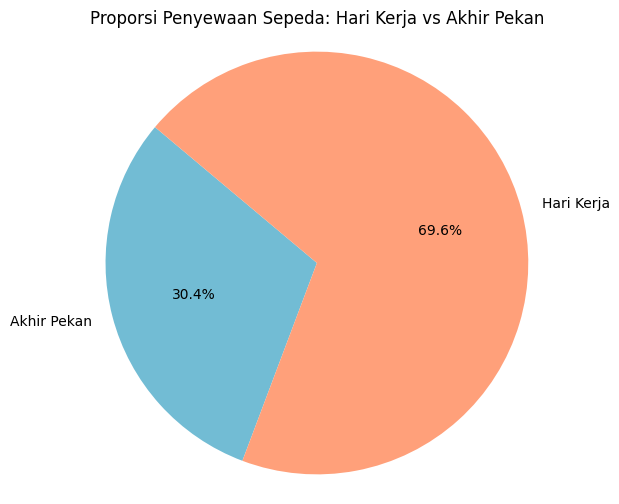

In [ ]:
# Pie Chart: Proporsi Penyewaan Sepeda Hari Kerja vs Akhir Pekan**
plt.figure(figsize=(6, 6))
plt.pie(
    workingday_counts["cnt"],
    labels=workingday_counts["workingday"],
    autopct="%1.1f%%",
    colors=["#72BCD4", "#FFA07A"],
    startangle=140
)
plt.title("Proporsi Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.axis("equal")  
plt.show()

### Pertanyaan 2: Bagaimana perbedaan jumlah penyewaan sepeda berdasarkan musim?

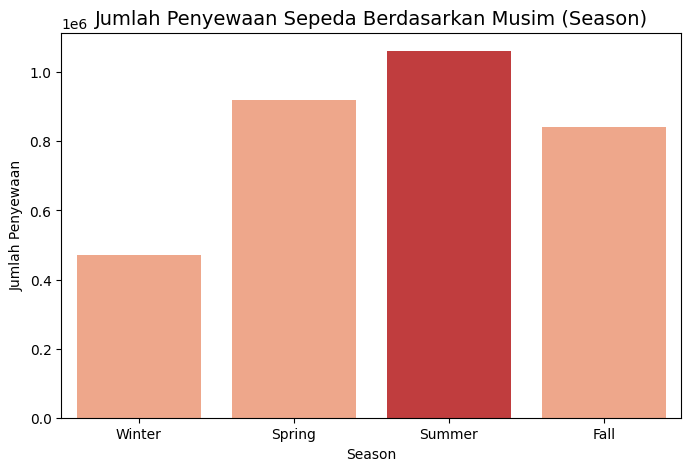

In [118]:
# Mengelompokkan data berdasarkan musim dan menghitung total penyewaan
season_counts = all_df.groupby("season_label", observed=False)["cnt"].sum().reset_index()

# Penentuan warna
highlight_color = "#D62728"  # Warna untuk penyewaan tertinggi
base_color = "#FFA07A"  # Warna dasar lebih soft

max_season = season_counts.loc[season_counts["cnt"].idxmax(), "season_label"]
colors = [highlight_color if season == max_season else base_color for season in season_counts["season_label"]]

# Visualisasi bar chart
plt.figure(figsize=(8, 5))
sns.barplot(
    data=season_counts,
    x="season_label",
    y="cnt",
    estimator=sum,
    hue="season_label",
    legend=False, 
    palette=colors
)

plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim (Season)", fontsize=14)
plt.xlabel("Season")
plt.ylabel("Jumlah Penyewaan")
plt.show()


### Pertanyaan 3: Bagaimana pola penyewaan sepeda antara pengguna kasual dan pengguna terdaftar berdasarkan hari kerja dan akhir pekan?

<Figure size 800x500 with 0 Axes>

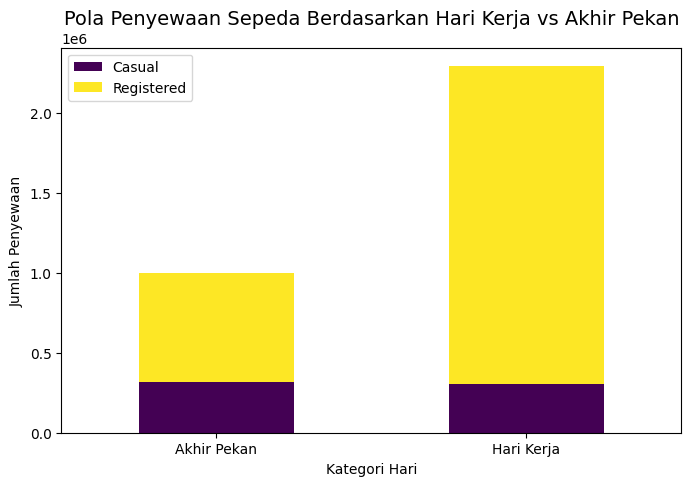

In [85]:
# Kelompokkan data berdasarkan hari kerja vs akhir pekan
workingday_counts = all_df.groupby("workingday", observed=True)[["casual", "registered"]].sum().reset_index()

# Ganti angka workingday dengan label yang lebih jelas
workingday_counts["workingday"] = workingday_counts["workingday"].map({0: "Akhir Pekan", 1: "Hari Kerja"})

# Plot stacked bar chart berdasarkan hari kerja vs akhir pekan
plt.figure(figsize=(8, 5))
workingday_counts.set_index("workingday").plot(kind="bar", stacked=True, colormap="viridis", figsize=(8, 5))
plt.title("Pola Penyewaan Sepeda Berdasarkan Hari Kerja vs Akhir Pekan", fontsize=14)
plt.xlabel("Kategori Hari")
plt.ylabel("Jumlah Penyewaan")
plt.legend(["Casual", "Registered"])
plt.xticks(rotation=0)  
plt.show()


**Insight:**
- Penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan akhir pekan, dengan persentase sekitar 69,6% di hari kerja dan 30,4% di akhir pekan. Hal ini mengindikasikan bahwa sepeda lebih sering digunakan sebagai sarana transportasi untuk aktivitas rutin seperti bekerja atau sekolah, daripada sekadar untuk rekreasi.
- Berdasarkan musim, jumlah penyewaan tertinggi terjadi di musim panas, diikuti oleh musim semi dan musim gugur. Sementara itu, musim dingin mencatat jumlah penyewaan terendah, kemungkinan karena kondisi cuaca yang kurang mendukung aktivitas bersepeda. Ini menunjukkan bahwa cuaca yang lebih hangat dan cerah mendorong lebih banyak orang untuk menggunakan sepeda.
- Dari pola penggunaan, pengguna terdaftar (registered users) mendominasi penyewaan sepeda baik di hari kerja maupun akhir pekan, menunjukkan bahwa banyak yang menggunakannya untuk keperluan rutin. Namun, pada akhir pekan, proporsi pengguna kasual (casual users) meningkat, yang mengindikasikan bahwa sepeda lebih sering dimanfaatkan untuk rekreasi saat hari libur.

## Analisis Lanjutan (Opsional)

Clustering jumlah penyewaan harian

In [94]:
def categorize_demand(cnt):
    if cnt <= 200:
        return "Low Demand"
    elif cnt <= 600:
        return "Medium Demand"
    else:
        return "High Demand"

# Tambahkan kategori demand
all_df["demand_category"] = all_df["cnt"].apply(categorize_demand)

Clustering musim berdasarkan rata-rata penyewaan

In [96]:
season_avg = all_df.groupby("season_label", observed=False)["cnt"].mean().sort_values()

low_season = season_avg.index[0]
medium_season = season_avg.index[1]
high_season = season_avg.index[2]

def categorize_season(season):
    if season == low_season:
        return "Low Season"
    elif season == medium_season:
        return "Medium Season"
    else:
        return "High Season"

# Tambahkan kategori musim
all_df["season_category"] = all_df["season_label"].apply(categorize_season)

In [ ]:
#Simpan kembali ke main_data
all_df.to_csv("dashboard/main_data.csv", index=False)


Analisis Distribusi Clustering

In [100]:
# Distribusi kategori demand
demand_distribution = all_df["demand_category"].value_counts()
print(demand_distribution)

demand_category
Low Demand       10784
Medium Demand     5930
High Demand        665
Name: count, dtype: int64


In [101]:
# Distribusi kategori musim
season_distribution = all_df["season_category"].value_counts()
print(season_distribution)

season_category
High Season      8905
Low Season       4242
Medium Season    4232
Name: count, dtype: int64


In [102]:
# Hubungan Demand dengan Musim
season_demand = all_df.groupby("season_category")["demand_category"].value_counts().unstack()
print(season_demand)

demand_category  High Demand  Low Demand  Medium Demand
season_category                                        
High Season              471        4776           3658
Low Season                22        3492            728
Medium Season            172        2516           1544


Visualisasi Clustering

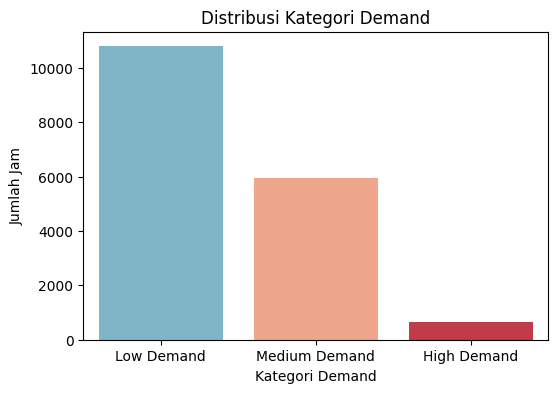

In [117]:
## 1. Visualisasi Distribusi Kategori Demand

# Memastikan demand_distribution adalah DataFrame
demand_distribution_df = demand_distribution.reset_index()
demand_distribution_df.columns = ["demand_category", "count"]  # Ubah nama kolom agar sesuai

plt.figure(figsize=(6, 4))
sns.barplot(
    data=demand_distribution_df,
    x="demand_category",
    y="count",
    hue="demand_category",
    legend=False,
    palette={"Low Demand": "#72BCD4", "Medium Demand": "#FFA07A", "High Demand": "#D72638"},
)
plt.title("Distribusi Kategori Demand")
plt.xlabel("Kategori Demand")
plt.ylabel("Jumlah Jam")
plt.show()

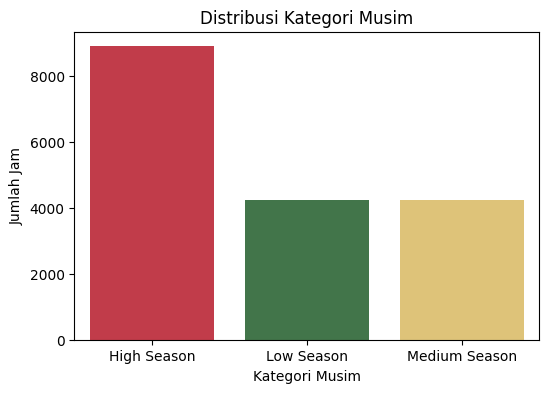

In [114]:
## 2. Visualisasi Distribusi Kategori Musim
season_distribution_df = season_distribution.reset_index()
season_distribution_df.columns = ["season_category", "count"] 

plt.figure(figsize=(6, 4))
sns.barplot(
    data=season_distribution_df,
    x="season_category",
    y="count",
    hue="season_category",
    legend=False,
    palette={"Low Season": "#3A7D44", "Medium Season": "#EFCB68", "High Season": "#D72638"},
)
plt.title("Distribusi Kategori Musim")
plt.xlabel("Kategori Musim")
plt.ylabel("Jumlah Jam")
plt.show()

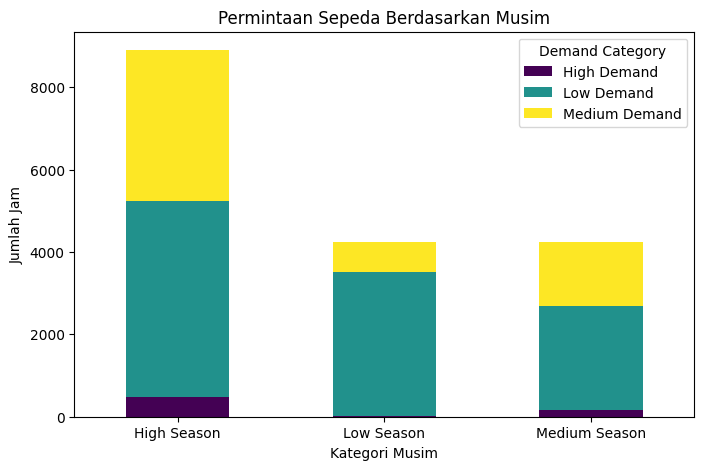

In [119]:
## 3. Visualisasi Hubungan Demand dan Musim
season_demand.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="viridis")
plt.title("Permintaan Sepeda Berdasarkan Musim")
plt.xlabel("Kategori Musim")
plt.ylabel("Jumlah Jam")
plt.xticks(rotation=0)
plt.legend(title="Demand Category")
plt.show()

## Conclusion

- Conclusion Pertanyaan 1 (Perbandingan Jumlah Penyewaan Sepeda pada Hari Kerja dan Akhir Pekan)
    - Bar chart menunjukkan bahwa total penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan.
    - Pie chart mengonfirmasi proporsi ini, dengan 69,6% penyewaan terjadi di hari kerja dan 30,4% di akhir pekan.
    - Hal ini menunjukkan bahwa sepeda lebih sering digunakan sebagai alat transportasi utama pada hari kerja, sementara di akhir pekan lebih sedikit digunakan, kemungkinan lebih bersifat rekreasi.

- Conclusion Pertanyaan 2 (Perbedaan Jumlah Penyewaan Sepeda Berdasarkan Musim)
    - Penyewaan tertinggi terjadi di musim panas (summer), disusul oleh musim semi (spring) dan musim gugur (fall).
    - Musim dingin (winter) memiliki jumlah penyewaan terendah, yang kemungkinan disebabkan oleh kondisi cuaca yang kurang mendukung aktivitas bersepeda.
    - Menunjukkan bahwa cuaca yang lebih hangat dan cerah cenderung meningkatkan minat masyarakat dalam menggunakan sepeda.

- Conclusion Pertanyaan 3 (Pola Penyewaan Sepeda antara Pengguna Kasual dan Terdaftar Berdasarkan Hari Kerja dan Akhir Pekan)
    - Pengguna terdaftar (registered users) mendominasi penyewaan sepeda baik di hari kerja maupun akhir pekan, menunjukkan bahwa banyak pengguna menggunakan sepeda untuk kebutuhan rutin.
    - Namun, pada akhir pekan, proporsi pengguna kasual (casual users) meningkat, menandakan bahwa sepeda lebih banyak digunakan untuk keperluan rekreasi saat hari libur.

## Conclusion Analisis Lanjutan (Clustering Manual)

1. **Sebagian besar hari masuk dalam kategori *Low Demand*, diikuti oleh *Medium Demand*, sementara *High Demand* hanya sedikit.** Ini menunjukkan bahwa jumlah penyewaan sepeda per hari umumnya rendah hingga menengah, dan hanya sedikit hari dengan lonjakan permintaan yang sangat tinggi.

2. **Musim dengan penyewaan tertinggi (*High Season*) memiliki jumlah hari yang lebih banyak dibandingkan *Low Season*.** Hal ini mengindikasikan bahwa sebagian besar periode dalam setahun memiliki kondisi yang mendukung tingginya permintaan sepeda, sementara musim dengan penyewaan terendah lebih terbatas dalam durasi.

3. **Pada *High Season*, sebagian besar hari masuk dalam kategori *Medium Demand* dan *High Demand*,** yang menandakan bahwa kondisi musim yang lebih baik cenderung meningkatkan aktivitas bersepeda. Sebaliknya, di *Low Season*, mayoritas hari berada dalam kategori *Low Demand*, yang berarti bahwa faktor musim berperan besar dalam menurunkan jumlah penyewaan.

4. **Musim memiliki pengaruh signifikan terhadap pola permintaan sepeda.** *Low Season* didominasi oleh *Low Demand*, kemungkinan akibat faktor cuaca atau kondisi lingkungan yang kurang mendukung aktivitas bersepeda.

5. **Untuk meningkatkan penyewaan pada *Low Season*, strategi seperti promosi, diskon, atau peningkatan fasilitas dapat diterapkan.** Upaya ini dapat membantu menjaga tingkat penyewaan tetap stabil sepanjang tahun, bahkan di musim dengan permintaan lebih rendah.